<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Mood_Detection_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [9]:
data = pd.read_csv("/content/2018.csv", sep=",")

In [10]:
print(data.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [11]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [12]:
# Adjust column selection based on actual dataset
# Example assumes 'Happiness Score' as proxy for mood score and 'Economy (GDP per Capita)' as a feature
data = data[['GDP per capita', 'Score']]  # Adjust these column names as needed
data.rename(columns={'Score': 'mood_score', 'GDP per capita': 'GDP per capita'}, inplace=True)

In [13]:
# Feature selection and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
data[['GDP per capita', 'mood_score']] = scaler.fit_transform(data[['GDP per capita', 'mood_score']])

In [15]:
# Train-test split
X = data[['GDP per capita']]
y = data['mood_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Build XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
# Predict and evaluate
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2:.2f}")

R2 Score: 0.53


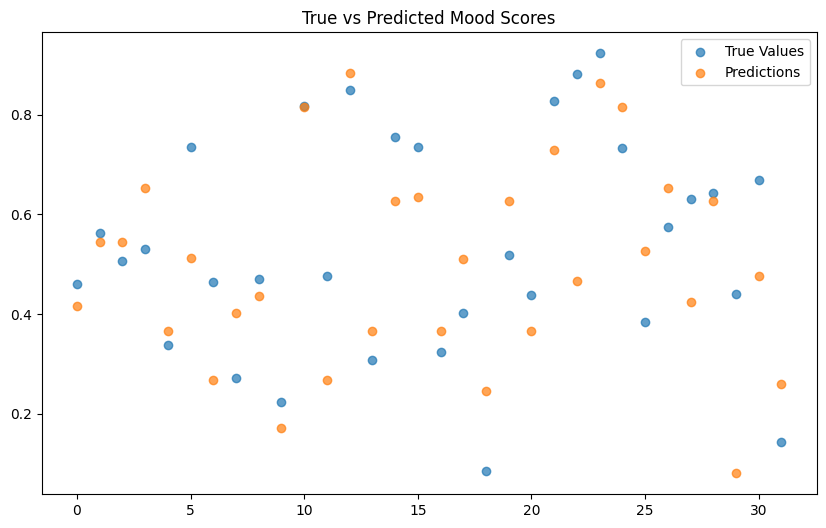

In [18]:
# Visualization of predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(predictions)), predictions, label='Predictions', alpha=0.7)
plt.legend()
plt.title('True vs Predicted Mood Scores')
plt.show()


Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit
Choose an option: 1
Enter GDP per capita value (scaled between 0 and 1): 0.8

Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit
Choose an option: 1
Enter GDP per capita value (scaled between 0 and 1): 0.2

Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit
Choose an option: 1
Enter GDP per capita value (scaled between 0 and 1): 0.5

Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit
Choose an option: 1
Enter GDP per capita value (scaled between 0 and 1): 1

Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit
Choose an option: 2


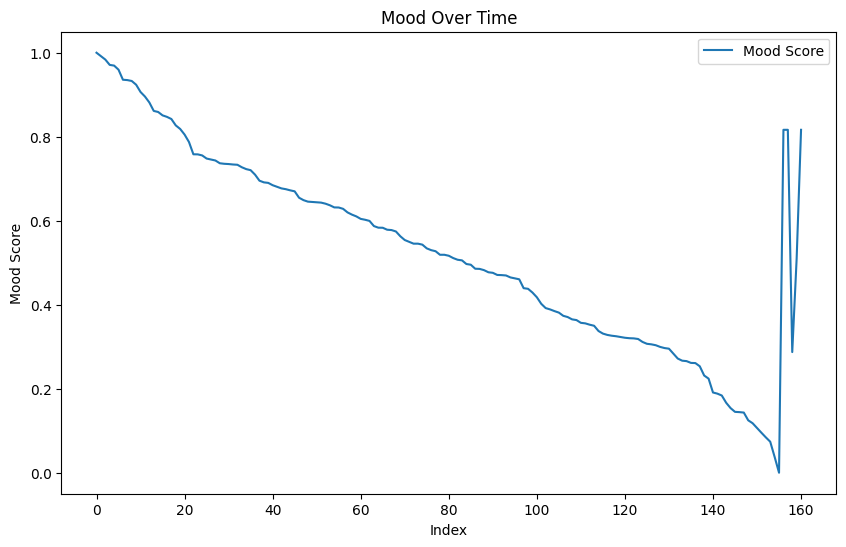


Mood Journal Menu:
1. Input new mood
2. Visualize mood history
3. Exit


KeyboardInterrupt: Interrupted by user

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() # Moved scaler initialization to after data loading

# Functionality for user interaction
def input_mood():
    gdp = float(input("Enter GDP per capita value (scaled between 0 and 1): "))
    return pd.DataFrame({"GDP per capita": [gdp]})

# Functionality to visualize previous moods
def visualize_moods(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['mood_score'], label='Mood Score')
    plt.xlabel('Index')
    plt.ylabel('Mood Score')
    plt.title('Mood Over Time')
    plt.legend()
    plt.show()

# Example menu
# Moved scaler fitting here, before the menu loop
scaler = MinMaxScaler()
scaler.fit(data[['GDP per capita']])  # Fit scaler to existing 'GDP per capita' data

while True:
    print("\nMood Journal Menu:")
    print("1. Input new mood")
    print("2. Visualize mood history")
    print("3. Exit")
    choice = input("Choose an option: ")

    if choice == '1':
        new_mood = input_mood()
        new_mood_scaled = scaler.transform(new_mood[['GDP per capita']])  # Ensure correct columns are passed
        new_mood['mood_score'] = model.predict(new_mood_scaled)
        data = pd.concat([data, new_mood], ignore_index=True)
    elif choice == '2':
        visualize_moods(data)
    elif choice == '3':
        print("Exiting Mood Journal. Goodbye!")
        break
    else:
        print("Invalid option. Please try again.")